In [1]:
import sys, os
import torch, wandb
import torch.nn as nn
from torch.utils.data import DataLoader
sys.path.append(os.path.abspath(os.path.join(os.curdir, '..')))

In [ ]:
from configs import DPT_hard_aug_config as config
from models.dpt import DPT
from datasets.depth_dataset import DepthDataset
import utils.train_utils as tu
from utils.train_utils import train_model

In [4]:
# Set a fixed random seed for reproducibility
torch.manual_seed(config.random_seed)

train_full_dataset = DepthDataset(
    data_dir=os.path.join(config.dataset_path, 'train/train'),
    list_file=os.path.join(config.dataset_path, 'train_list.txt'), 
    transform=config.transform_train,
    target_transform=config.target_transform,
    has_gt=True,
    use_albumentations=True)
    
    # Create test dataset without ground truth
test_dataset = DepthDataset(
    data_dir=os.path.join(config.dataset_path, 'test/test'),
    list_file=os.path.join(config.dataset_path, 'test_list.txt'),
    transform=config.transform_val,
    has_gt=False,
    use_albumentations=True)  # Test set has no ground truth
    
# Split training dataset into train and validation
total_size = len(train_full_dataset)
train_size = int((1-config.val_part) * total_size)  
val_size = total_size - train_size    
    
train_dataset, val_dataset = torch.utils.data.random_split(
    train_full_dataset, [train_size, val_size]
)
#val_dataset.transform = config.transform_val # I dont think we need to use augmentations for validation

# Create data loaders with memory optimizations
train_loader = DataLoader(
    train_dataset, 
    batch_size=config.train_bs, 
    shuffle=True, 
    num_workers=config.num_workers, 
    pin_memory=True,
    drop_last=True,
    persistent_workers=True
)
    
    
val_loader = DataLoader(
    val_dataset, 
    batch_size=config.val_bs, 
    shuffle=False, 
    num_workers=config.num_workers, 
    pin_memory=True
)
    
test_loader = DataLoader(
    test_dataset, 
    batch_size=config.val_bs, 
    shuffle=False, 
    num_workers=config.num_workers, 
    pin_memory=True
)

print(f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}")

Train size: 22772, Validation size: 1199, Test size: 650


In [5]:
model = config.model()
# #model = nn.DataParallel(model)


optimizer = config.optimizer(model.parameters())
print(f"Using device: {config.device}")


/home/v.lomtev/env/python3.12_vlad/lib/python3.12/site-packages/segmentation_models_pytorch/decoders/dpt/model.py:118: UserWarning: Encoder does not have prefix tokens (e.g. cls_token), but `decoder_readout` is set to 'cat'. It's recommended to set `decoder_readout='ignore'` when using a encoder without prefix tokens.
  warnings.warn(


Using device: cuda:0


In [6]:
exp_name = "DPT_mixedloss_normalizedlog_aug"

In [ ]:
print("Starting training...")
with wandb.init(project="CIL",
                save_code=True,
                notes=config.WANDB_NOTES):
    model = train_model(model, train_loader, val_loader,
                        config.loss, optimizer, config.epochs, config.device,
                       exp_path=os.path.join(config.dataset_path, exp_name), log_input=True,
                       mask_indicator=config.additional_params["MASK_INDICATOR"])

Starting training...


wandb: Currently logged in as: noloo to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch 1/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:46<00:00,  1.61it/s]


Train Loss: 0.1082, Validation Loss: 0.0631
New best model saved at epoch 1 with validation loss: 0.0631
Epoch 2/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:41<00:00,  1.81it/s]


Train Loss: 0.0812, Validation Loss: 0.0577
New best model saved at epoch 2 with validation loss: 0.0577
Epoch 3/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:41<00:00,  1.79it/s]


Train Loss: 0.0440, Validation Loss: 0.0342
New best model saved at epoch 16 with validation loss: 0.0342
Epoch 17/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:44<00:00,  1.69it/s]


Train Loss: 0.0440, Validation Loss: 0.0338
New best model saved at epoch 17 with validation loss: 0.0338
Epoch 18/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:42<00:00,  1.77it/s]


Train Loss: 0.0432, Validation Loss: 0.0333
New best model saved at epoch 18 with validation loss: 0.0333
Epoch 19/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:43<00:00,  1.72it/s]


Train Loss: 0.0428, Validation Loss: 0.0339
Epoch 20/50


Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:45<00:00,  1.65it/s]


Train Loss: 0.0424, Validation Loss: 0.0327
New best model saved at epoch 20 with validation loss: 0.0327
Epoch 21/50


Training:  35%|█████████████████████████████████████████████████████▌                                                                                                    | 990/2846 [08:13<15:13,  2.03it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:35<00:00,  2.09it/s]


Train Loss: 0.0417, Validation Loss: 0.0322
New best model saved at epoch 23 with validation loss: 0.0322
Epoch 24/50


Training:  11%|█████████████████▋                                                                                                                                        | 326/2846 [02:46<20:50,  2.02it/s]

In [14]:
tu.evaluate_model(model, val_loader, config.device,
                  exp_path=os.path.join(config.dataset_path, exp_name), log_input=True)

Evaluating: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:57<00:00,  1.30it/s]


{'MAE': 0.305976132327395,
 'RMSE': 0.8099992827413208,
 'siRMSE': 0.0583887602916427,
 'REL': 183885.42522569388,
 'Delta1': 0.915909555889689,
 'Delta2': 0.9274995154412715,
 'Delta3': 0.9295299948145923}

In [15]:
importlib.reload(tu)
tu.generate_test_predictions(model, test_loader, config.device,
                             exp_path=os.path.join(config.dataset_path, exp_name), log_input=True)

Generating Test Predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:13<00:00,  3.01it/s]


Visualizing:  15%|██████████████████████▋                                                                                                                                    | 6/41 [00:40<03:53,  6.67s/it]


KeyboardInterrupt: 

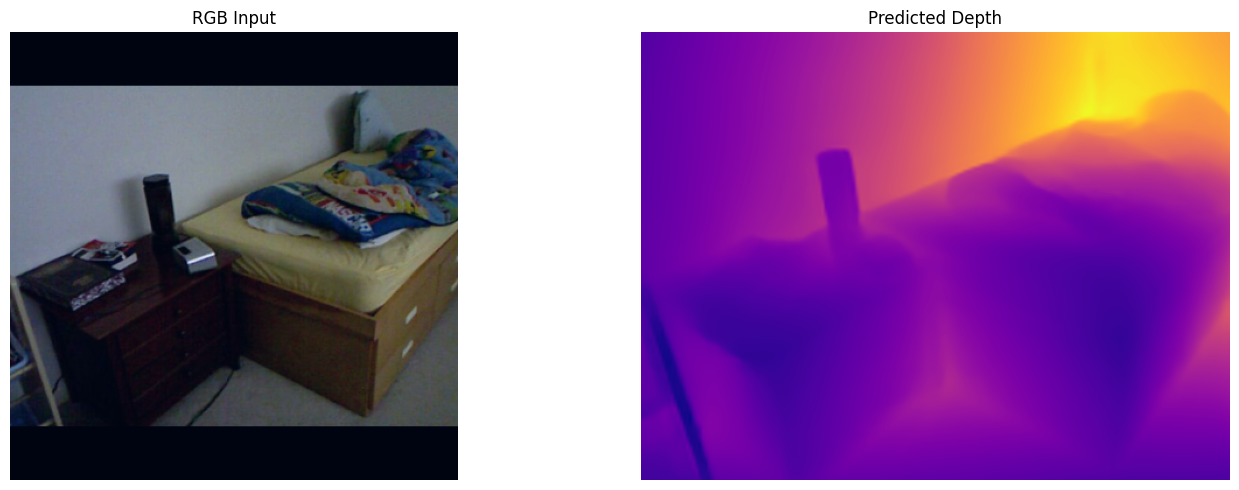

In [16]:
importlib.reload(tu)
tu.visualize_test_predictions(model, test_loader, config.device,
                              exp_path=os.path.join(config.dataset_path, exp_name), log_input=True)

In [ ]:
torch.cuda.empty_cache()